---
# Setup

## Modules

In [1]:
import os
import pandas as pd
import copy
from Bio import Phylo, AlignIO
from functions import *
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors, lines
import seaborn as sns

## Paths

In [2]:
#WILDCARDS = ["all", "chromosome", "full", "5"]
WILDCARDS = ["all", "chromosome", "full", "30"]
project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/denmark/"
#project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main_filter/"
results_dir = project_dir

READS_ORIGIN = WILDCARDS[0]
LOCUS_NAME = WILDCARDS[1]
PRUNE = WILDCARDS[2]
MISSING_DATA = WILDCARDS[3]

In [3]:
#metadata_path       = project_dir + "/iqtree_stats/{}/{}/{}/filter{}/metadata.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
metadata_path       = project_dir + "/iqtree/{}/{}/{}/filter{}/filter-taxa/metadata.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)

beast_dir           = project_dir + "/beast/{}/{}/{}/filter{}/relaxed_clock/dates/run/".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
tree_path           = project_dir + "/beast/{}/{}/{}/filter{}/relaxed_clock/dates/run/beast_mcc.nex".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
auspice_config_path = results_dir + "config/auspice_config.json"
ml_colors_path      = project_dir + "/augur/{}/{}/{}/filter{}/ml/colors.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)
ml_latlon_path      = project_dir + "/augur/{}/{}/{}/filter{}/ml/latlon.tsv".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)


# ------------------------------------------
# Alignment
constant_sites_path = project_dir + "/snippy_multi/all/chromosome/full/snippy-multi.constant_sites.txt"
aln_path            = project_dir + "/beast/{}/{}/{}/filter{}/beast.fasta".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA)

# ------------------------------------------
# Output
auspice_dir         = os.path.join(results_dir, "auspice/{}/{}/{}/filter{}/beast/".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA))
if not os.path.exists(auspice_dir):
    subprocess.run(["mkdir", "-p", auspice_dir]) 
    
augur_dir           = os.path.join(results_dir, "augur/{}/{}/{}/filter{}/beast/".format(READS_ORIGIN, LOCUS_NAME, PRUNE, MISSING_DATA))
if not os.path.exists(augur_dir):
    subprocess.run(["mkdir", "-p", augur_dir]) 

## Variables

In [4]:
NO_DATA_CHAR = "NA"
JSON_INDENT = 2

POSTERIOR_THRESH = 95
BURNIN = 0.1
CURRENT_YEAR = 2021

# ------------------------------------------
# Alignment
with open(constant_sites_path) as infile:
    data = infile.read().strip().split(",")
    constant_sites = sum([int(count) for count in data])

aln = AlignIO.read(aln_path, "fasta")
variant_sites = len(aln[0].seq)
SEQ_LEN = constant_sites + variant_sites

# ------------------------------------------
# Plotting
plt.rcParams['axes.facecolor']    ='white'
plt.rcParams['savefig.facecolor'] ='white'
plt.rcParams['savefig.dpi']       = 400
plt.rcParams['svg.fonttype']      = 'none'

## Metadata

In [5]:
metadata_df = pd.read_csv(metadata_path, sep='\t')
metadata_df.set_index(metadata_df.columns[0], inplace=True)
metadata_df.fillna(NO_DATA_CHAR, inplace=True)

display(metadata_df)

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,...,date_bp_mean,date_err,lat,lon,host_human,branch_major_color,geometry_size,geometry,root_rtt_dist,clade_rtt_dist
sample,,,,,,,,,,,,,,,,,,,,,
SAMEA5818830,STN021,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.219460e-05,1.219460e-05
SAMEA5818829,STN020,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.193820e-05,1.193820e-05
SAMEA5818828,STN019,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.200810e-05,1.200810e-05
SAMEA5818826,STN014,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.190030e-05,1.190030e-05
SAMEA5818825,STN013,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.240440e-05,1.240440e-05
SAMEA5818822,STN008,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.279040e-05,1.279040e-05
SAMEA5818821,STN007,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.219460e-05,1.219460e-05
SAMEA5818818,STN002,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.798562,8.231974,46.942756,8.411977,Second Pandemic,...,461.0,75.0,46.942756,8.411977,Human,#8000ff,8.0,POINT (8.4119773 46.942756),1.205790e-05,1.205790e-05
SAMEA5818817,STA001,[1420:1630],[-601:-391],Germany,Bavaria,51.083420,10.423447,48.946756,11.403872,Second Pandemic,...,496.0,105.0,48.946756,11.403872,Human,#8000ff,4.0,POINT (11.4038717 48.9467562),5.659800e-06,5.659800e-06


# Colors

In [6]:
out_path_colors = ml_colors_path.replace("/ml/", "/beast/")

with open(ml_colors_path, "r") as infile:
    with open(out_path_colors, "w") as outfile:
        outfile.write(infile.read())
        
colors_dict = {}
colors_dict["population"] = {'0.PRE': '#8000ff', '0.PE': '#5148fc', '0.ANT': '#238af5', '0.ANT4': '#0cc1e8', '3.ANT': '#3ae8d7', '4.ANT': '#68fcc1', '2.ANT': '#97fca7', '2.MED': '#c5e88a', '1.PRE': '#f3c16a', '1.ANT': '#ff8a48', '1.IN': '#ff4824', '1.ORI': '#ff0000', 'NA': '#c4c4c4'}


## Log

In [7]:
log_path = tree_path.replace("_mcc.nex", ".log")
with open(log_path, "r") as infile:
    read_lines = infile.read().split("\n")
    
    clean_lines = []
    header_found = False

    # Strip comments                
    for line in read_lines:
        if not line.startswith("#"):
            clean_line = line.split("\t")
            if not header_found:
                header = clean_line
                header_found = True
            elif clean_line != [""]:
                clean_lines.append(clean_line)

    # Store states and parameters as dict
    param_dict = {}
    for i in range(0,len(header)):
        param = header[i]
        values = [float(line[i]) for line in clean_lines]
        param_dict[param] = values

    # Construct data frame
    df = pd.DataFrame(param_dict)

    # Discard burnin
    burnin_lines = round(len(clean_lines) * BURNIN)
    df = df.iloc[burnin_lines:]

    # Number of states
    num_states = list(df["Sample"])[-1]    
    
print("States:", num_states)
display(df)

States: 100000000.0


,Sample,posterior,likelihood,prior,treeLikelihood.dna,TreeHeight,logP(mrca(D51.leaf.prior)),height(D51),logP(mrca(SAMEA5818803.leaf.prior)),height(SAMEA5818803),...,mrca.date-backward(Ingroup),ucldMean,ucldStdev,rate.mean,rate.variance,rate.coefficientOfVariation,freqParameter.1,freqParameter.2,freqParameter.3,freqParameter.4
1000,10000000.0,-5.948748e+06,-5.948274e+06,-473.516088,-5.948274e+06,467.780462,-8.709308,407.183498,-3.732590,378.520591,...,713.878913,6.692002e-08,0.991680,6.200908e-08,4.084302e-15,0.905758,0.262901,0.236580,0.238729,0.261789
1001,10010000.0,-5.948753e+06,-5.948279e+06,-473.095995,-5.948279e+06,475.945611,-8.690572,408.057849,-4.072504,376.681896,...,713.685387,7.735954e-08,1.107552,6.954896e-08,5.293070e-15,0.956969,0.262901,0.236580,0.238729,0.261789
1002,10020000.0,-5.948748e+06,-5.948281e+06,-466.868385,-5.948281e+06,472.585811,-8.487049,417.736277,-2.933868,387.945009,...,724.039920,6.251256e-08,0.822563,6.484980e-08,5.071555e-15,1.072980,0.262901,0.236580,0.238806,0.261713
1003,10030000.0,-5.948766e+06,-5.948274e+06,-492.280485,-5.948274e+06,499.110973,-10.134591,347.124238,-3.093967,392.244310,...,741.303422,4.510677e-08,0.702835,5.016705e-08,2.406654e-15,1.066869,0.262734,0.236580,0.239055,0.261631
1004,10040000.0,-5.948764e+06,-5.948290e+06,-473.917019,-5.948290e+06,463.473027,-9.525915,371.389193,-5.379570,404.587479,...,713.326368,4.927671e-08,0.420082,6.398506e-08,1.924567e-15,0.936137,0.262734,0.236580,0.239055,0.261631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,99960000.0,-5.948758e+06,-5.948288e+06,-470.179662,-5.948288e+06,472.479644,-7.224156,487.850901,-3.053519,384.330709,...,714.765860,6.618143e-08,1.018166,6.337006e-08,1.041064e-15,0.535289,0.262455,0.236461,0.239023,0.262061
9997,99970000.0,-5.948761e+06,-5.948280e+06,-481.482188,-5.948280e+06,474.601171,-7.445054,473.946318,-3.068806,391.896594,...,718.570511,5.860398e-08,0.923503,5.745444e-08,8.821000e-16,0.548063,0.262455,0.236461,0.239023,0.262061
9998,99980000.0,-5.948775e+06,-5.948279e+06,-495.558218,-5.948279e+06,480.683988,-7.691702,459.405231,-3.225366,393.726822,...,732.393866,5.003485e-08,0.758609,5.090833e-08,8.065005e-16,0.593090,0.262455,0.236461,0.239023,0.262061
9999,99990000.0,-5.948768e+06,-5.948291e+06,-477.464861,-5.948291e+06,484.673145,-7.388742,477.404943,-5.339815,404.452113,...,731.977764,5.270329e-08,1.060227,5.730960e-08,9.492138e-16,0.580372,0.262652,0.236734,0.239023,0.261591


In [8]:
danish_samples = {
    "D62" : "G25A",    
    "D71" : "G16", 
    "R36" : "G25B x98",    
    "P387" : "A1480 x1480",
    "P187" : "A146 x3011",    
    "P212" : "G371",
    "D72" : "G207",     
    "D75" : "G861 x1035",         
    "D51" : "Gr GC 15" ,    
}

### Tip Date Estimates

|G25A|1334|1301|1366|
|G16|1350|1319|1382|
|G25B x98|1370|1336|1408|
|A1480 x1480|1429|1392|1467|
|A146 x3011|1433|1403|1464|
|G371|1457|1427|1487|
|G207|1513|1484|1546|
|G861 x1035|1525|1495|1560|
|Gr GC 15|1594|1550|1649|


,D62,D71,R36,P387,P187,P212,D72,D75,D51
0,1338.441152,1331.010217,1342.768642,1406.879896,1410.462705,1446.957206,1516.181038,1546.370419,1613.816502
1,1332.452364,1354.403104,1345.033920,1404.840836,1414.991945,1436.798381,1508.151393,1534.678930,1612.942151
2,1331.330174,1357.696890,1339.533783,1412.043476,1436.554332,1447.323806,1528.395279,1553.282082,1603.263723
3,1335.245927,1361.109823,1440.373614,1438.895058,1436.666641,1468.680393,1549.298433,1574.080709,1673.875762
4,1339.298081,1343.376896,1376.233268,1439.557815,1432.938520,1473.470445,1523.037971,1543.165357,1649.610807
...,...,...,...,...,...,...,...,...,...
8996,1336.236535,1331.583641,1348.018943,1436.843683,1422.215244,1437.238501,1502.687850,1558.220407,1533.149099
8997,1324.161851,1325.082229,1367.247882,1417.651406,1431.346822,1472.855361,1505.981774,1531.153997,1547.053682
8998,1310.403738,1307.881971,1332.982776,1491.058304,1436.900909,1440.645529,1492.993054,1518.108192,1561.594769
8999,1296.045106,1319.116594,1342.340558,1446.086248,1443.122558,1443.680629,1493.302290,1500.392113,1543.595057


'out_path = os.path.join(beast_dir, "danish_tip_dates")\nplt.savefig(out_path + ".png", bbox_inches="tight")\nplt.savefig(out_path + ".svg", bbox_inches="tight")'

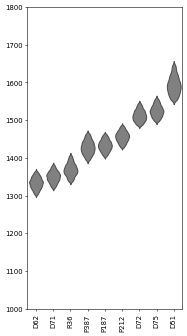

In [29]:
DPI=50
FIGSIZE=[4,8]

tip_df = pd.DataFrame()
ci_df = pd.DataFrame()

for col in df.columns:
    if "height(" in col:
        sample = col.replace("height(","").replace(")","")  


for sample in danish_samples:
    for col in df.columns:
        if sample in col and "height" in col:

            dates = [CURRENT_YEAR - d for d in df[col]]

            ci_date = np.array(
                np.percentile(
                    np.array(dates),
                    (100 - 95, 95),
                    axis=0,
                )
            )
            mean_date = sum(dates) / len(dates)
            print("|{}|{}|{}|{}|".format(danish_samples[sample], round(mean_date), round(ci_date[0]), round(ci_date[1])))

            # Data
            tip_df[sample] = dates
            ci_df[sample] = [d for d in dates if d >= ci_date[0] and d <= ci_date[1]]

display(tip_df)
        
            
## All
fig, axes = plt.subplots(1, figsize=FIGSIZE, dpi=DPI)

# -------------------------------
# tMRCA
ax = axes

sns.violinplot(
    ax=ax, 
    data=ci_df, 
    #y="population", 
    #x="age(root)", 
    inner=None, 
    scale="width", 
    color="grey",
    #order=population_list + ["prune"],
    #palette=colors_dict["population"],
)

ax.set_ylim(1000, 1800)
plt.xticks(rotation=90)


"""out_path = os.path.join(beast_dir, "danish_tip_dates")
plt.savefig(out_path + ".png", bbox_inches="tight")
plt.savefig(out_path + ".svg", bbox_inches="tight")"""

## Phylogeny

### Import Beast MCC Tree

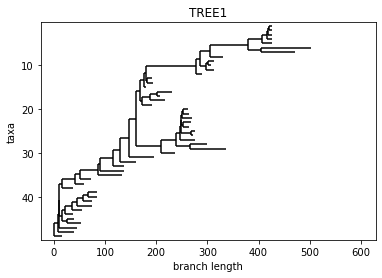

In [10]:
# Construct a dictionary to hold the trees
tree_dict = {}

# Add tree files to dict
tree_dict["tree_file_raw"] = tree_path 
tree_dict["tree_file_edit"] = os.path.splitext(tree_path)[0] + "_edit.nex"
tree_dict["sample_rename"] = {}


# Read in raw tree to deal with dashes
with open(tree_dict["tree_file_raw"],  "r") as infile:                    
    with open(tree_dict["tree_file_edit"], "w") as outfile:           
        raw_tree = infile.read()
        # Remove quotations if they exist
        raw_tree = raw_tree.replace("'","")

        # Split into lines to iterate over
        raw_tree_lines = raw_tree.split("\n")

        # By default don't parse a line for dashes
        taxa_line = False

        for line in raw_tree_lines: 

            if "TREE" not in line and "-" in line:

                if len(line.split(" ")) == 1:
                    name_dashes = line.strip()
                    name_no_dashes = name_dashes.replace("-","_")
                    tree_dict["sample_rename"][name_no_dashes] = name_dashes
                line = line.replace("-","_")

            outfile.write(line + "\n")

#print(tree_dict)

# Read in edited tree
trees = Phylo.parse(tree_dict["tree_file_edit"], "nexus")
# There should be only 1 tree
for t in trees:
    tree_dict["tree"] = t
    tree_dict["tree"].ladderize(reverse=True)
    break

# Rename sample names back to with dashes
for c in tree_dict["tree"].find_clades():
    if c.name in tree_dict["sample_rename"]:
        orig_name = c.name
        c.name = tree_dict["sample_rename"][c.name]
        print("Rename:", orig_name, c.name)

    # Strip the date suffix
    #if c.name:
    #    c.name = "_".join(c.name.split("_")[0:-1])           

# Rename internal nodes
node_i = 0
for c in tree_dict["tree"].find_clades():
    if not c.name:
        c.name = "NODE{}".format(node_i)
        node_i += 1

Phylo.draw(tree_dict["tree"], label_func = lambda x: '')

# Most Recent Sampling Date (MRSD)

In [13]:
#mrsd = max(metadata_df["date_mean"])

mrsd = CURRENT_YEAR

### Add Tree Metadata to Dataframe

In [15]:
tree = tree_dict["tree"]

parameters = [
    "branch_length",
    "branch_length_sub",
    "node_type",    
    "branch_support",
    "branch_support_conf_category",
    "branch_support_conf_char",
    # Custom
    "country_date_strain",
    "province_date_strain",
    # Rate
    "rate",
    "rate_hpd",
    "rate_sub",
    "rate_sub_year",
    # Geo
    "continuous_geo",
    "continuous_geo_coord",    
    "continuous_geo_lat", 
    "continuous_geo_lon",    
    # Dates
    "height",
    "height_hpd",
    "timetree_num_date",
    "timetree_num_date_confidence",
]

# Add to dataframe
for param in parameters:
    metadata_df[param] = [NO_DATA_CHAR] * len(metadata_df)

# Dummy naming of locations geo
locations_geo_dict = {}
locations_geo_i = 1
    
for c in tree.find_clades():
    # Defaults
    node_type = "internal"
    branch_support = 0
    branch_support_conf_category = "LOW"
    branch_support_conf_char = ""
    branch_length = 0
    branch_length_sub = 0
    branch_length_time = tree.common_ancestor(c.name).branch_length
    country_date_strain = NO_DATA_CHAR
    province_date_strain = NO_DATA_CHAR
    rate_hpd = [0,0]
    rate = 0
    rate_sub_year = 0
    timetree_num_date = 0
    timetree_num_date_confidence = [0,0]
    height = 0
    height_hpd = [0,0]    
    locations_geo_coord = [NO_DATA_CHAR, NO_DATA_CHAR]
    locations_geo_name = NO_DATA_CHAR
    
    comment_dict = parse_comment(c.comment)


    # Branch Length
    if c.branch_length:
        branch_length = c.branch_length

    # Branch support
    if "posterior" in comment_dict:
        branch_support = float(round(float(comment_dict["posterior"]) * 100))
        if branch_support >= 95:
            branch_support_conf_category = "HIGH"
            branch_support_conf_char = "*"

    # Rates
    if "rate" in comment_dict:
        rate = float(comment_dict["rate"])
        rate_sub = rate

        if c.branch_length:
            rate_sub_year = rate * SEQ_LEN
            branch_length_sub = rate_sub_year * c.branch_length

    if "rate_95%_HPD" in comment_dict:
        rate_hpd_split = comment_dict["rate_95%_HPD"].strip("{}").split(",")
        rate_hpd = [float(r) for r in rate_hpd_split]   
        
    # Dates        
    if "height" in comment_dict:
        height = float(comment_dict["height"])

    if "height_95%_HPD" in comment_dict:
        height_hpd_split = comment_dict["height_95%_HPD"].strip("{}").split(",")
        height_hpd = [float(h) for h in height_hpd_split]

    height_hpd_reverse = copy.copy(height_hpd)
    height_hpd_reverse.reverse()
    timetree_num_date = float(round(mrsd - height))
    timetree_num_date_confidence = [round(mrsd - h) for h in height_hpd_reverse]  
        
    
    # Geo
    if "locationsgeo" in comment_dict:
        locations_geo_coord_split = comment_dict["locationsgeo"].strip("{}").split(",")
        locations_geo_coord = [float(l) for l in locations_geo_coord_split]
        
        if locations_geo_coord not in locations_geo_dict.values():
            locations_geo_name = "loc{}".format(locations_geo_i)
            locations_geo_dict[locations_geo_name] = locations_geo_coord
            locations_geo_i += 1
        else:
            for name, coord in locations_geo_dict.items():
                if coord == locations_geo_coord:
                    locations_geo_name = name
        
        
    if c.is_terminal():
        node_type = "terminal"
        country = metadata_df["country"][c.name]
        province = metadata_df["province"][c.name]
        date = metadata_df["date"][c.name]
        strain = metadata_df["strain"][c.name]

        country_date_strain = "{} {} {}".format(country, date, strain)
        province_date_strain = "{} {} {}".format(province, date, strain)
    
    # Add
    metadata_df.at[c.name, "branch_length"] = branch_length
    metadata_df.at[c.name, "branch_length_sub"] = branch_length_sub
    metadata_df.at[c.name, "branch_length_time"] = branch_length_time
    metadata_df.at[c.name, "node_type"] = node_type
    metadata_df.at[c.name, "branch_support"] = branch_support
    metadata_df.at[c.name, "branch_support_conf_category"] = branch_support_conf_category
    metadata_df.at[c.name, "branch_support_conf_char"] = branch_support_conf_char
    metadata_df.at[c.name, "country_date_strain"] = country_date_strain
    metadata_df.at[c.name, "province_date_strain"] = province_date_strain


    metadata_df.at[c.name, "rate"] = rate
    metadata_df.at[c.name, "rate_hpd"] = rate_hpd
    metadata_df.at[c.name, "rate_sub"] = rate_sub
    metadata_df.at[c.name, "rate_sub_year"] = rate_sub_year
    
    metadata_df.at[c.name, "height"] = height
    metadata_df.at[c.name, "height_hpd"] = height_hpd      


    metadata_df.at[c.name, "timetree_num_date"] = timetree_num_date
    metadata_df.at[c.name, "timetree_num_date_confidence"] = timetree_num_date_confidence   
    
    metadata_df.at[c.name, "continuous_geo_coord"] = locations_geo_coord
    metadata_df.at[c.name, "continuous_geo"] = locations_geo_name
    metadata_df.at[c.name, "continuous_geo_lat"] = locations_geo_coord[0]
    metadata_df.at[c.name, "continuous_geo_lon"] = locations_geo_coord[1]
 
  
    
    
# Update internal nodes NA
metadata_df.fillna(NO_DATA_CHAR, inplace=True)
display(metadata_df)

,strain,date,date_bp,country,province,country_lat,country_lon,province_lat,province_lon,biovar,...,rate_sub_year,continuous_geo,continuous_geo_coord,continuous_geo_lat,continuous_geo_lon,height,height_hpd,timetree_num_date,timetree_num_date_confidence,branch_length_time
sample,,,,,,,,,,,,,,,,,,,,,
SAMEA5818830,STN021,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.7986,8.23197,46.9428,8.41198,Second Pandemic,...,0.171736,NA,"[NA, NA]",NA,NA,237.698983,"[172.2302786764335, 320.8567069106599]",1783.0,"[1700, 1849]",4.699374
SAMEA5818829,STN020,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.7986,8.23197,46.9428,8.41198,Second Pandemic,...,0.172775,NA,"[NA, NA]",NA,NA,245.936139,"[180.05505350951182, 327.53466125263174]",1775.0,"[1693, 1841]",11.803908
SAMEA5818828,STN019,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.7986,8.23197,46.9428,8.41198,Second Pandemic,...,0.175975,NA,"[NA, NA]",NA,NA,246.115659,"[181.6098172292643, 328.5680990974853]",1775.0,"[1692, 1839]",11.597622
SAMEA5818826,STN014,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.7986,8.23197,46.9428,8.41198,Second Pandemic,...,0.175761,NA,"[NA, NA]",NA,NA,247.460674,"[183.03436053134095, 331.7023619277743]",1774.0,"[1689, 1838]",10.279374
SAMEA5818825,STN013,[1485:1635],[-536:-386],Switzerland,Nidwalden,46.7986,8.23197,46.9428,8.41198,Second Pandemic,...,0.197902,NA,"[NA, NA]",NA,NA,233.790112,"[170.11192431228056, 319.9122117845398]",1787.0,"[1701, 1851]",8.608244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE43,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.192108,NA,"[NA, NA]",NA,NA,474.659547,"[411.2826383976913, 553.3405636186826]",1546.0,"[1468, 1610]",13.207630
NODE44,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.191899,NA,"[NA, NA]",NA,NA,465.123283,"[405.19893927043756, 545.3043423427621]",1556.0,"[1476, 1616]",9.970230
NODE45,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.222768,NA,"[NA, NA]",NA,NA,453.460238,"[393.80629042699655, 531.1482813167438]",1568.0,"[1490, 1627]",11.645200


## Adjust Dates (for aDNA?)

In [ ]:
# Find the sample that had a fixed date
"""fixed_date_sample = "SAMN00715800"
fixed_date = 672
estimate_date = metadata_df.loc[fixed_date_sample]["height"]
date_conversion = fixed_date - estimate_date
print(date_conversion)"""

"""
# Convert heights to calendar dates
for rec in metadata_df.iterrows():
    sample = rec[0]
    height = rec[1]["height"]
    height_hpd = rec[1]["height_hpd"]
    height_hpd_reverse = copy.copy(height_hpd)
    height_hpd_reverse.reverse()
    
    timetree_num_date = round(mrsd - height - date_conversion)
    timetree_num_date_confidence = [round(mrsd - h - date_conversion) for h in height_hpd_reverse]

    metadata_df.at[sample, "timetree_num_date"] = timetree_num_date
    metadata_df.at[sample, "timetree_num_date_confidence"] = timetree_num_date_confidence
    
display(metadata_df)"""

## Geo

In [ ]:
out_path_latlon = ml_latlon_path.replace("/ml/", "/beast/")

with open(ml_latlon_path, "r") as infile:
    with open(out_path_latlon, "w") as outfile:
        outfile.write(infile.read())

# Continuous
with open(out_path_latlon, "a") as outfile:
    for name, coord in locations_geo_dict.items():
        lat = str(coord[0])
        lon = str(coord[1])
        outfile.write("continuous_geo" + "\t" + name + "\t" + lat + "\t" + lon + "\n")

## Rates

In [ ]:
ci_1_std = np.array(
        np.percentile(
            np.array(list(metadata_df["rate_sub_year"])),
            (0, 68),
            axis=0,
        )
    )
ci_2_std = np.array(
        np.percentile(
            np.array(list(metadata_df["rate_sub_year"])),
            (0, 95),
            axis=0,
        )
    )

rate_thresholds = [0, ci_1_std[1], ci_2_std[1]]
rate_categories = ["LOW", "MED", "HIGH"]
rate_colors = ["#949494", "#1f77b4", "#d62728"]

for sample in metadata_df.index:
    rate = metadata_df["rate_sub_year"][sample]    
    for thresh, cat in zip(rate_thresholds, rate_categories):
        if rate > thresh:
            rate_cat = cat
    metadata_df.at[sample, "rate_sub_year_category"] = rate_cat


with open(out_path_colors, "a") as outfile:
    for cat, col in zip(rate_categories, rate_colors):
        line = "{}\t{}\t{}".format("rate_sub_year_category", cat, col)
        print(line)
        outfile.write(line + "\n")

---
# Plot

In [ ]:
# ---------------------------------------
# PLOT SETUP
FONTSIZE=14
plt.rc('font', size=FONTSIZE)
DPI=100
FIGSIZE=[12,6]

fig, axes = plt.subplots(1, 2, figsize=FIGSIZE, dpi=DPI)

ax = axes[0]

sns.histplot(
    ax=ax,
    data=metadata_df,
    x="rate_sub_year",
    zorder=1,  
    ec="black",
    lw=0,
    color=rate_colors[0],
    alpha=1
)

for patch in ax.patches:
    rate = patch.get_x()
    for thresh, col in zip(rate_thresholds, rate_colors):    
        if rate > thresh:
            patch.set_facecolor(col)

ax.set_xlabel("Substitutions Per Year")
ax.set_ylabel("Number of Samples")

x_buff = 0.03
ax.axvline(ci_1_std[1] + x_buff, ls="dashdot", color="black", lw=1, label="68%")
ax.axvline(ci_2_std[1], ls="--", color="black", lw=1, label="95%")

ax.legend(loc=1, edgecolor="black", fontsize=FONTSIZE - 2, title="Rate Category", title_fontsize=FONTSIZE)


palette = copy.copy(rate_colors)
palette.reverse()

# ---- 
# Time
ax = axes[1]
sns.scatterplot(
    ax=ax,
    data=metadata_df,
    x="timetree_num_date",
    y="rate_sub_year",  
    ec="black",
    #s=10,
    hue="rate_sub_year_category",
    palette=palette,
    lw=0,
)

---

# ?. Export

## Metadata

In [ ]:
out_path_metadata = os.path.join(augur_dir, "metadata.tsv")
print(out_path_metadata)
metadata_df.to_csv(out_path_metadata, sep="\t", index=True)

## Timetree

In [ ]:
out_tree = copy.deepcopy(tree)

metadata_to_comment(out_tree, metadata_df)    
out_path_tree_nex = os.path.join(augur_dir, "all.timetree.nex")
Phylo.write(out_tree, out_path_tree_nex, "nexus")

for c in out_tree.find_clades():
    c.comment = None

out_tree_nwk_path = os.path.join(augur_dir, "all.timetree.nwk")
Phylo.write(out_tree, out_tree_nwk_path, "newick")

## Create Sub Dataframe

In [ ]:
# Remember, order atters when dealing with confidence!

columns = [
    # Draw Divergence Tree / Required
    "branch_length",
    "branch_length_sub",
    
    # Time Tree    
    "branch_length_time",
    "date_mean",
    "date_err",
    "date_bp_mean",       
    "timetree_num_date",
    "timetree_num_date_confidence",
    
    # Branch Support
    "branch_support",
    "branch_support_conf_category",  
    "branch_support_conf_char",  
    
    # Geo
    "continuous_geo",
    "continent",
    "province",
    "country",
    "province_lat",
    "province_lon",
    "country_lat",
    "country_lon",
    # Other geo are part of mugration later
    
    # Colors and Filters   
    "branch_minor",
    "node_type",
    "branch_number",
    "host_human",    
    "host_order",
    "population",
    
    # Text Description
    "biosample_accession",
    "strain",
    "country_date_strain",
    "province_date_strain",
    
    # Stats    
    "root_rtt_dist",
    "population_rtt_dist",    
    #"root_geo_dist",
    #"population_geo_dist",
    "rate_sub",
    "rate_sub_year", 
    "rate_sub_year_category",
    "tstv",
    "ns_ss_ratio",
    "other_var_ratio",    
]

# Edit df
auspice_df = copy.deepcopy(metadata_df[columns])
auspice_df["node_name"] = list(auspice_df.index)
auspice_df["blank"] = [" "] * len(auspice_df)

for attr in MUG_ATTRIBUTE_LIST:
    auspice_df.rename(columns={attr: attr + "_raw"}, inplace=True)     

display(auspice_df)

## Augur JSON

In [ ]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import augur_export

augur_dict = augur_export(
    tree_path=None, 
    aln_path=None,  
    tree=tree, 
    tree_df=auspice_df, 
    color_keyword_exclude=["geometry"],
    type_convert = {
        "branch_number" : (lambda x : str(x))
    },
)

first_node = list(augur_dict["nodes"].keys())[0]

print(augur_dict["nodes"][first_node])

out_path_augur_json = os.path.join(augur_dir, "all.json" )
utils.write_json(data=augur_dict, file_name=out_path_augur_json, indent=JSON_INDENT)

## Auspice JSON

In [ ]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import auspice_export, branch_attributes

auspice_dict = auspice_export(
    tree=tree,
    augur_json_paths=[out_path_augur_json], 
    auspice_config_path=auspice_config_path, 
    auspice_colors_path=out_path_colors,
    auspice_latlons_path=out_path_latlon, 
    auspice_geo_res=["country", "province", "continuous_geo",]
    )


label_col = list(auspice_df.columns)

# Recursively add branch attrs
branch_attributes(
    tree_dict=auspice_dict["tree"], 
    sub_dict=auspice_dict["tree"], 
    df=auspice_df,
    label_col=label_col,
    )


# Last manual changes
auspice_dict_copy = copy.deepcopy(auspice_dict)
for i in range(0, len(auspice_dict_copy["meta"]["colorings"])):
    coloring = auspice_dict_copy["meta"]["colorings"][i]
    for key in coloring:
        # Node type as internal or terminal
        if coloring[key] == "node_type":
            auspice_dict["meta"]["colorings"][i]['scale'] = [['internal', '#FFFFFF'], ['terminal', '#000000']]
            #print(auspice_dict["meta"]["colorings"][i])
        # Confidence category
        if "conf_category" in coloring[key]:
            auspice_dict["meta"]["colorings"][i]['scale'] = [['LOW', '#FFFFFF'], ['HIGH', '#000000']]
            #print(auspice_dict["meta"]["colorings"][i])
        
# Write outputs - For Local Rendering
out_path_auspice_local_json = os.path.join(auspice_dir, "all.json" )
utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
export_v2.validate_data_json(out_path_auspice_local_json)
print("Validation successful for local JSON.\n")

#out_path_auspice_remote_json = os.path.join(auspice_dir, "{}_all.json".format(AUSPICE_PREFIX))
#utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
#export_v2.validate_data_json(out_path_auspice_local_json)
#print("Validation successful for local JSON.\n")

## Subtrees

In [ ]:
#import sys, importlib
#importlib.reload(sys.modules['functions'])
#from functions import extract_subtree

population_list = ['0.PRE', '0.PE', '0.ANT', '0.ANT4', '4.ANT', '3.ANT', '1.PRE', '1.ANT', '1.IN', '1.ORI', '2.ANT', '2.MED']
timetree = tree

for population in population_list:
    timetree_copy = copy.deepcopy(timetree)
    
    # Create the subtree df
    df = metadata_df[metadata_df["population"] == population]
    color = df["population_color"][0]
    
    #if len(subtree_df) < 2: continue
    print(population, color)

    #df.sort_values("timetree_coord_y", inplace=True)
    tips = df[df["node_type"] == "terminal"]
    internals = df[df["node_type"] == "internal"]
    
    # ----------------------------------------------
    # Subtree Timetree
    subtree = extract_subtree(
        tree=timetree_copy, 
        tips=list(tips.index), 
        df=metadata_df, 
        color_branches=False)
    
    metadata_to_comment(subtree, metadata_df)   


    out_subtree_nex_path = os.path.join(augur_dir, "{}.timetree.nex".format(population))
    Phylo.write(subtree, out_subtree_nex_path, "nexus")
    out_subtree_nwk_path = os.path.join(augur_dir, "{}.timetree.nwk".format(population))
    Phylo.write(subtree, out_subtree_nwk_path, "newick")
    
    
    augur_dict = augur_export(
        tree_path=None, 
        aln_path=None,  
        tree=subtree, 
        tree_df=auspice_df, 
        color_keyword_exclude=["geometry"],
        type_convert = {
            "branch_number" : (lambda x : str(x))
        },
    ) 
        
    out_path_augur_json = os.path.join(augur_dir, "{}.json".format(population) )
    utils.write_json(data=augur_dict, file_name=out_path_augur_json, indent=JSON_INDENT)

    auspice_dict = auspice_export(
        tree=subtree,
        augur_json_paths=[out_path_augur_json], 
        auspice_config_path=auspice_config_path, 
        auspice_colors_path=out_path_colors,
        auspice_latlons_path=out_path_latlon, 
        )    
    
    label_col = list(auspice_df.columns)

    # Recursively add branch attrs
    branch_attributes(
        tree_dict=auspice_dict["tree"], 
        sub_dict=auspice_dict["tree"], 
        df=auspice_df,
        label_col=label_col,
        )    
    
    # Last manual changes
    auspice_dict_copy = copy.deepcopy(auspice_dict)
    for i in range(0, len(auspice_dict_copy["meta"]["colorings"])):
        coloring = auspice_dict_copy["meta"]["colorings"][i]
        for key in coloring:
            # Node type as internal or terminal
            if coloring[key] == "node_type":
                auspice_dict["meta"]["colorings"][i]['scale'] = [['internal', '#FFFFFF'], ['terminal', color]]
                #print(auspice_dict["meta"]["colorings"][i])
            # Confidence category
            if "conf_category" in coloring[key]:
                auspice_dict["meta"]["colorings"][i]['scale'] = [['LOW', '#FFFFFF'], ['HIGH', color]]
                #print(auspice_dict["meta"]["colorings"][i]) 
    
    # Write outputs - For Local Rendering
    out_path_auspice_local_json = os.path.join(auspice_dir, "{}.json".format(population) )
    utils.write_json(data=auspice_dict, file_name=out_path_auspice_local_json, indent=JSON_INDENT, include_version=False)
    export_v2.validate_data_json(out_path_auspice_local_json)
    print("Validation successful for local JSON.\n")